# System Analysis

# Initialization

In [1]:
# Helper function to calculate Euclidean distance
import pandas as pd
from numpy import log10, sqrt

def euclid(x, y, df, take_log=False):
    if take_log:
        return sqrt(sum((log10(df[x])-log10(df[y]))**2))
    else:
        return sqrt(sum((df[x]-df[y])**2))


In [2]:
from zhang2007 import data; z07 = data()
from yin2008 import data; y08 = data()
from zhang2009 import data; z09 = data()
from zhang2010 import data; z10 = data()
from zhang2011 import data; z11 = data()
from kotani2017 import data; k17 = data()

%who list

k17	 y08	 z07	 z09	 z10	 z11	 


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
# Main Figures:
Table1 = pd.DataFrame()

# Peppercorn estimates
## Zhang 2007

In [5]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in z07:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose=0)
    for df in fig.get_dataframes():
        df['name']=fig.name
        #display(df)
        Table1 = Table1.append(df)


Zhang2007-F1
Zhang2007-F3
Zhang2007-F4


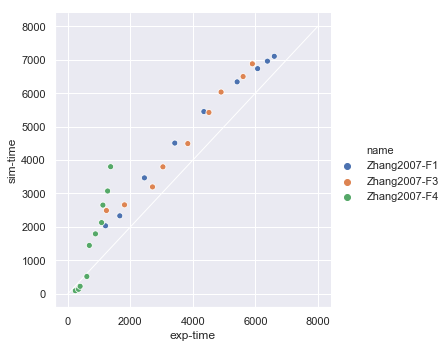

In [6]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['name'].isin([fig.name for fig in z07])]
#display(tmpfig)

# Plot data
sns.relplot(x="exp-time", y="sim-time", hue='name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 8e3)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Yin2008

In [7]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in y08:
    print(fig.name)
    display(fig.pepperargs['default'])
    fig.eval(verbose = 0)
    for df in fig.get_dataframes():
        df['name']=fig.name
        #display(df)
        Table1 = Table1.append(df)

Yin2008-F3


{'conc': 'nM', 'condensed': True, 'k_fast': 0.1, 'k_slow': 1e-05}

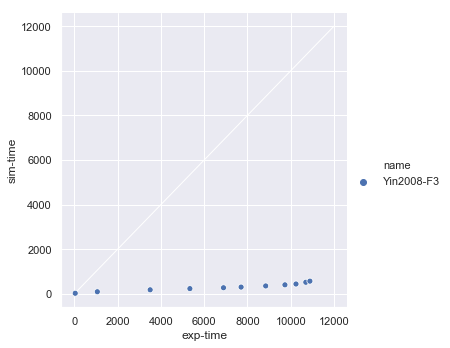

In [8]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['name'].isin([fig.name for fig in y08])]
#display(tmpfig)

sns.relplot(x="exp-time", y="sim-time", hue='name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 1.2e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Zhang 2009 

In [9]:
for fig in z09:
    print(fig.name)
    print(fig.pepperargs['default'])
    fig.eval()
    for df in fig.get_dataframes():
        df['name']=fig.name
        dist = euclid('exp-time', 'sim-time', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)
        

Zhang2009-F3
{'condensed': True, 'conc': 'nM'}
Zhang2009-F3 -- Fitness: 0.144782
Zhang2009-F4
{'condensed': True, 'conc': 'nM'}
Zhang2009-F4 -- Fitness: 0.163892
Zhang2009-F5
{'condensed': True, 'conc': 'nM'}
Zhang2009-F5 -- Fitness: 0.41931


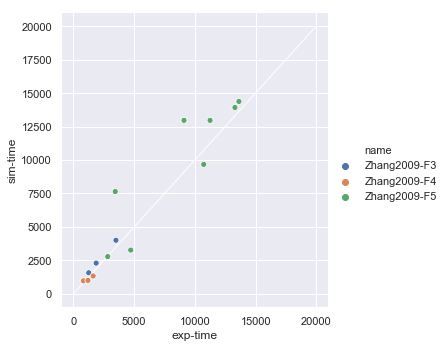

In [10]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['name'].isin([fig.name for fig in z09])]
#display(tmpfig)

sns.relplot(x="exp-time", y="sim-time", hue='name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 2e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Zhang 2010

In [11]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in z10:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose = 1)
    for df in fig.get_dataframes():
        df['name']=fig.name
        dist = euclid('exp-time', 'sim-time', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)

Zhang2010-F3A
tmp/Zhang2010-F3A-00: default
tmp/Zhang2010-F3A-00: default
Zhang2010-F3A -- Fitness: 0.424104
Zhang2010-F3B
tmp/Zhang2010-F3B-00: default
tmp/Zhang2010-F3B-00: default
Zhang2010-F3B -- Fitness: 0.180471
Zhang2010-F3C
tmp/Zhang2010-F3C-00: default
tmp/Zhang2010-F3C-00: default
Zhang2010-F3C -- Fitness: 0.03588
Zhang2010-F3D
tmp/Zhang2010-F3D-00: default
tmp/Zhang2010-F3D-00: default
Zhang2010-F3D -- Fitness: 0.0868665
Zhang2010-F10C
tmp/Zhang2010-F10C-00: default
tmp/Zhang2010-F10C-00: default
tmp/Zhang2010-F10C-00: default
Zhang2010-F10C -- Fitness: 0.36985
Zhang2010-F10F
tmp/Zhang2010-F10F-00: default
tmp/Zhang2010-F10F-00: default
tmp/Zhang2010-F10F-00: default
Zhang2010-F10F -- Fitness: 0.203484


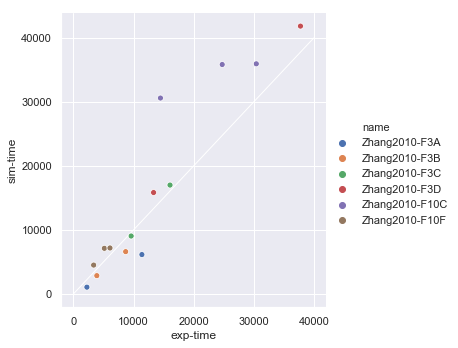

In [12]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['name'].isin([fig.name for fig in z10])]
#display(tmpfig)

sns.relplot(x="exp-time", y="sim-time", hue='name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 4e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

# Zhang 2011

In [13]:
for fig in z11:
    print(fig.name)
    #print(fig.pepperargs['default'])
    fig.eval(verbose=1)
    for df in fig.get_dataframes():
        df['name']=fig.name
        dist = euclid('exp-time', 'sim-time', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)

Zhang2011-F3A
tmp/Zhang2011-F3A-00: default
tmp/Zhang2011-F3A-00: default
tmp/Zhang2011-F3A-00: default
Zhang2011-F3A -- Fitness: 2.46629


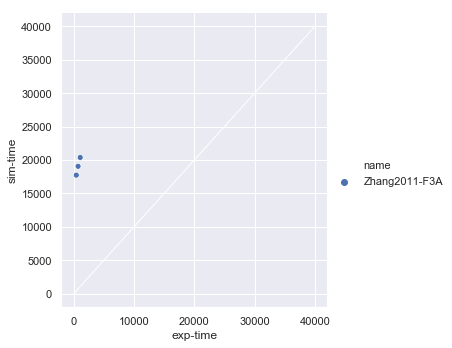

In [14]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['name'].isin([fig.name for fig in z11])]
#display(tmpfig)

sns.relplot(x="exp-time", y="sim-time", hue='name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1.5e0, 4e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Kotani & Hughes 2017

In [15]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in k17:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose = 1)
    for df in fig.get_dataframes():
        df['name']=fig.name
        dist = euclid('exp-time', 'sim-time', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)

Kotani2017-F2
tmp/Kotani2017-F2-00: default
tmp/Kotani2017-F2-00: default
tmp/Kotani2017-F2-00: default
Kotani2017-F2 -- Fitness: 0.233649
Kotani2017-F3
tmp/Kotani2017-F3-00: default
tmp/Kotani2017-F3-00: default
tmp/Kotani2017-F3-00: default
Kotani2017-F3 -- Fitness: 0.184182
Kotani2017-F4
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
Kotani2017-F4 -- Fitness: 0.460913


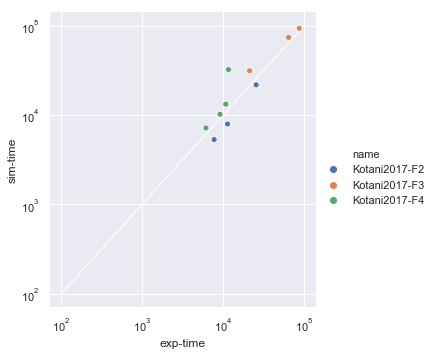

In [16]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['name'].isin([fig.name for fig in k17])]

sns.relplot(x="exp-time", y="sim-time", hue='name', data=tmpfig)
plt.xscale('log')
plt.yscale('log')
(mi, ma)=(1e2, 1e5)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

# Everything

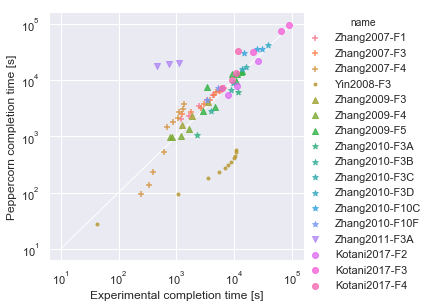

In [17]:
tmpfig = Table1
#tmpfig.reset_index(inplace=True, drop=True)
#tmpfig = tmpfig.iloc[0:-1]
#tmpfig = tmpfig.iloc[[4,5,6,7,28,29,30,31], :]
#display(tmpfig)


#sns.set_palette("husl")
#sns.set(rc={'figure.figsize':(4,4)})


m = ['+'] * 3
m += ['.']
m += ['^'] * 3
m += ['*'] * 6
m += ['v']
m += ['o'] * 3

#sns.relplot(x="exp-time", y="sim-time", hue='name', data=tmpfig)
g = sns.lmplot(x="exp-time", y="sim-time", hue='name', data=tmpfig, fit_reg=False, markers=m, legend=True)

plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e3, 1e5)
#plt.ylim(1e2, 1e6)
(mi, ma)=(1e1, 1e5)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
plt.gcf().set_size_inches(6.5,4.2)

g.set(xlabel='Experimental completion time [s]')  
g.set(ylabel='Peppercorn completion time [s]')

#plt.savefig('all_systems.pdf', bbox_inches='tight')
#plt.savefig('all_systems.svg', bbox_inches='tight')